# Demo 1: Fractals (Part 2)

In [1]:
import numpy as np
import torch

print("PyTorch Version :\t", torch.__version__)
print("CUDA Available? :\t", torch.cuda.is_available())

PyTorch Version :	 2.0.1+cu118
CUDA Available? :	 True


### A. Mandelbrot Set

The Mandelbrot set examines the rate of divergence of the set of all complex 
numbers. An image of the complex plane can be coloured according to the various
rates of divergence, and boundary of the converging and non-converging regions
forms a self-similar fractal.

In [20]:
# NOTE: slightly higher resolution than requested, for aesthetic reasons
Y, X = np.mgrid[-1.3:1.3:0.002, -2:1:0.002]

# Load into PyTorch tensors
x = torch.tensor(X, device="cuda")
y = torch.tensor(Y, device="cuda")
z = torch.complex(x, y)

zs = z.clone()
ns = torch.zeros_like(z)

In [21]:
# Mandelbrot set
for i in range(200):
    # Compute the new values of z: z^2 + x
    zs_ = zs * zs + z
    # Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged.type(torch.FloatTensor).to("cuda")
    zs = zs_

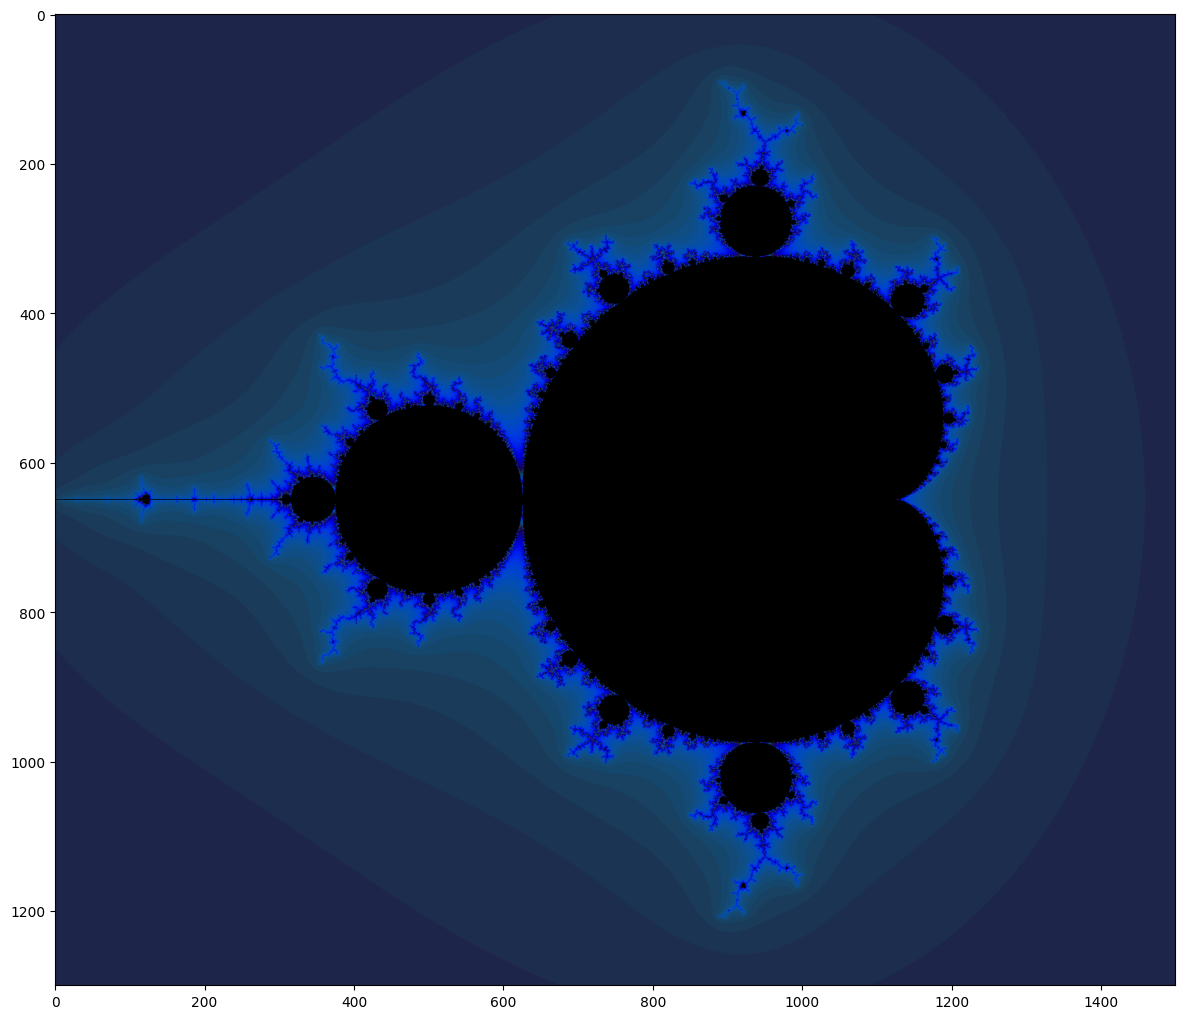

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 10))

def process_fractal(a):
    """Display an array of iteration counts as a colourful picture of a fractal."""
    a_cyclic = (np.pi * a / 20).reshape(list(a.shape)+[1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic), 
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a==a.abs().max()] = 0
    a = img.real
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(process_fractal(ns.to("cpu")))
plt.tight_layout(pad=0)
plt.show()

High resolution computation of the set by decreasing the `mgrid` spacing and zooming to another part of the Mandelbrot set and compute the image for it.

In [16]:
Y, X = np.mgrid[-1.3:1.3:0.002, -2:1:0.002]

ZOOM_FACTOR = 0.1
X_TRANSLATE = -7.625
Y_TRANSLATE = -1.625

# Load into PyTorch tensors
x = torch.tensor(X, device="cuda") + X_TRANSLATE
y = torch.tensor(Y, device="cuda") + Y_TRANSLATE
z = torch.complex(x, y) * ZOOM_FACTOR

zs = z.clone()
ns = torch.zeros_like(z)

In [17]:
# Mandelbrot set
for i in range(200):
    # Compute the new values of z: z^2 + x
    zs_ = zs * zs + z
    # Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged.type(torch.FloatTensor).to("cuda")
    zs = zs_

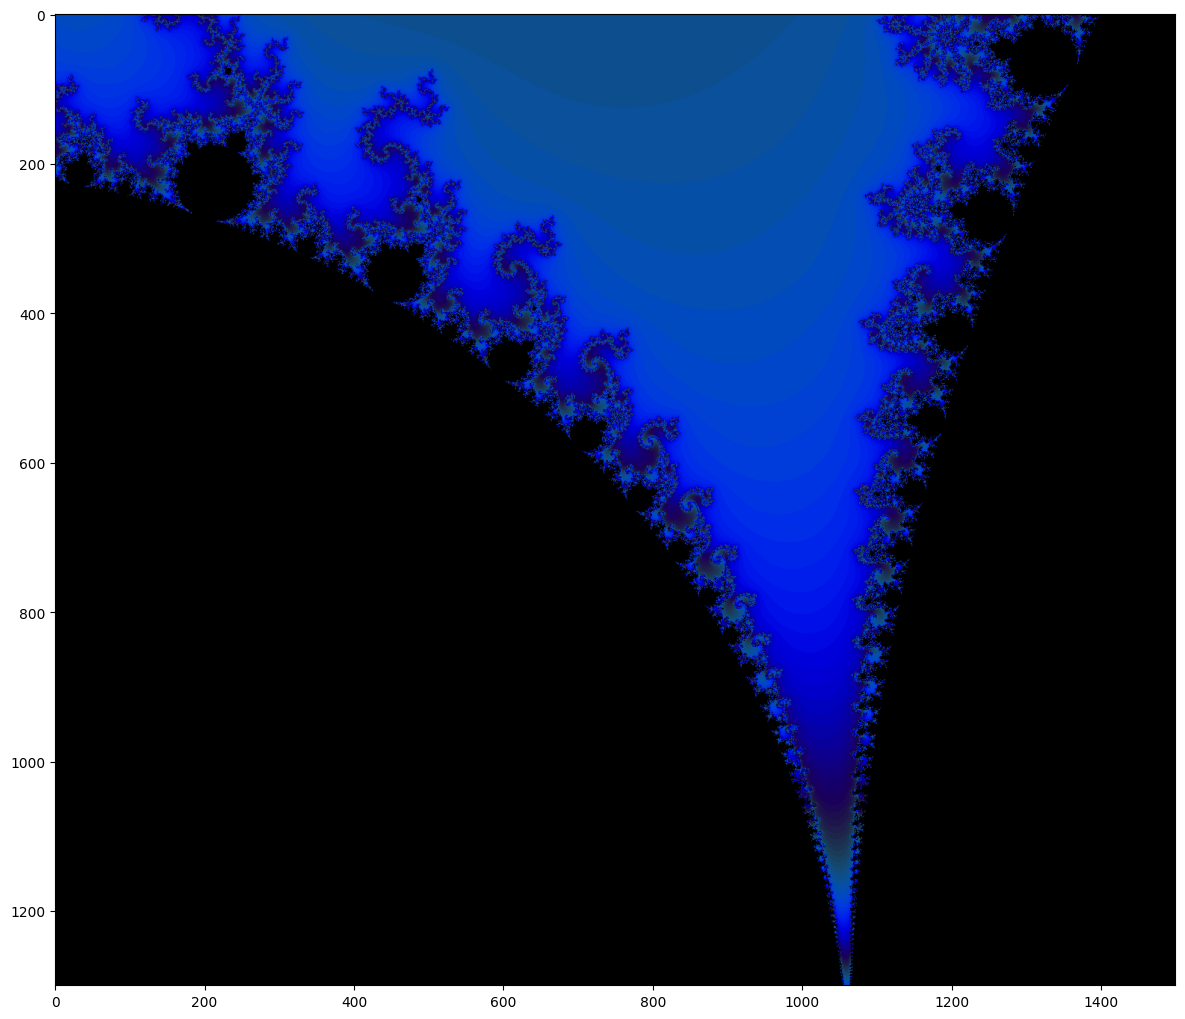

In [18]:
fig = plt.figure(figsize=(16, 10))

plt.imshow(process_fractal(ns.to("cpu")))
plt.tight_layout(pad=0)
plt.show()

### B. Julia Set

The Julia set is similar to the Mandelbrot set, except it examines the rate of
divergence of all complex numbers if a constant is added during each iteration.
As a corollary of this definition, the set of all Julia sets, each centred at
the point in the complex plane equal to the constant added, forms the Mandelbrot
set.

In [19]:
Y, X = np.mgrid[-1.3:1.3:0.002, -1.5:1.5:0.002]

ZOOM_FACTOR = 1
X_TRANSLATE = 0
Y_TRANSLATE = 0

# Load into PyTorch tensors
x = torch.tensor(X, device="cuda") + X_TRANSLATE
y = torch.tensor(Y, device="cuda") + Y_TRANSLATE
z = torch.complex(x, y) * ZOOM_FACTOR

zs = z.clone()
ns = torch.zeros_like(z)

Here, we choose to examine the Julia set for the constant: $c=-0.8+0.156j$. The
[Wikipedia page](https://en.wikipedia.org/wiki/Julia_set#Quadratic_polynomials)
contains examples of other constants which may be of visualisation interest.

In [90]:
# Julia set w/ f_c(z) = z^2 + c
c = torch.tensor(-0.8+0.156j)

for i in range(200):
    # Compute the new values of z: z^2 + c
    zs_ = zs * zs + c
    # Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged.type(torch.FloatTensor).to("cuda")
    zs = zs_

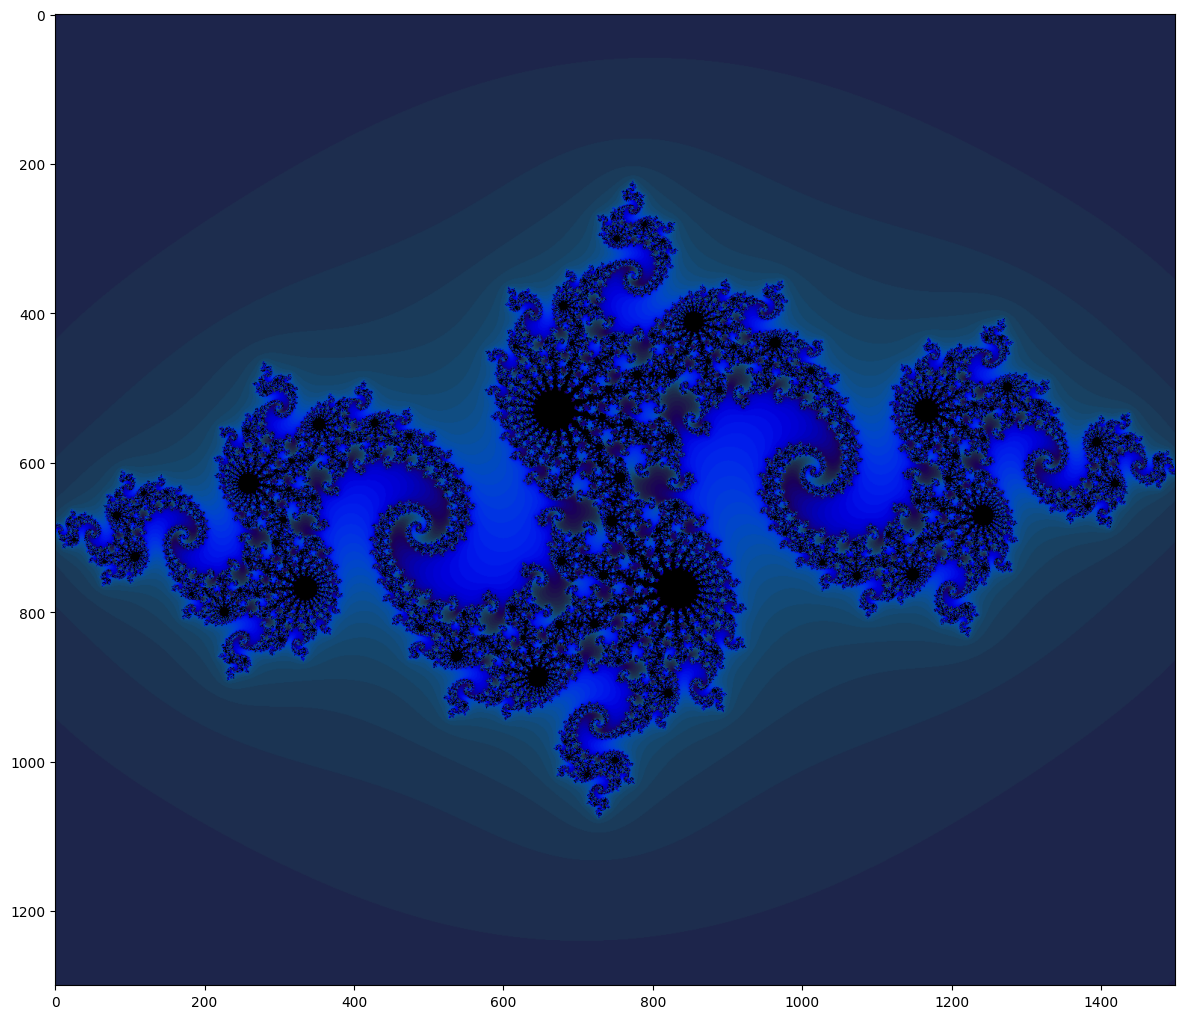

In [91]:
fig = plt.figure(figsize=(16, 10))

plt.imshow(process_fractal(ns.to("cpu")))
plt.tight_layout(pad=0)
plt.show()